In [6]:
import requests 
from dotenv import load_dotenv
import os

In [7]:
## Importing Bot token from env file

In [8]:
load_dotenv()
TelegramBotCredential=os.environ.get('BOT_TOKEN')
ReceiverTelegramID = int(os.environ.get('MY_TELEGRAM_ID'))


In [9]:

def SendMessageToTelegram(Message):
    try:
        Url = "https://api.telegram.org/bot" + str(TelegramBotCredential) +  "/sendMessage?chat_id=" + str(ReceiverTelegramID)
        
        textdata ={ "text":Message}
        response = requests.request("POST",Url,params=textdata)
    except Exception as e:
        Message = str(e) + ": Exception occur in SendMessageToTelegram"
        print(Message)  
		
		
def SendTelegramFile(FileName):
    Documentfile={'document':open(FileName,'rb')}
    
    Fileurl = "https://api.telegram.org/bot" + str(TelegramBotCredential) +  "/sendDocument?chat_id=" + str(ReceiverTelegramID)
      
    response = requests.request("POST",Fileurl,files=Documentfile)
	



In [5]:
SendMessageToTelegram("you are dumb")

In [11]:
class Stock:
    
    def __init__(self, name = '' , interval = 365  ):
        self.ticker = name
        self.data = None
        self.start_date = (datetime.datetime.today() - \
                           datetime.timedelta(days=interval)).strftime('%Y-%m-%d')
        self.end_date = datetime.datetime.today().strftime('%Y-%m-%d')
        self.df = None
        self.short_term_period = None
        self.mid_term_period = None
        self.long_term_period = None
        
        


    def get_data(self):
        self.data = yf.download( self.ticker, start=self.start_date, end=self.end_date)
        self.df = pd.DataFrame(self.data)
    
    
    def show_data(self,period = 1):
        print (self.df.tail(period) )

        #today's date
        #end_date = datetime.datetime.today().strftime('%Y-%m-%d')
        
        # Calculate the start date as one year ago from today
        #start_date = (datetime.datetime.today() - datetime.timedelta(days=365)).strftime('%Y-%m-%d')
        
        
        #data = yf.download(self.name, start=start_date, end=end_date)
        
        # Download data for TCS for the last year
        #data = yf.download('TCS.NS', start=start_date, end=end_date)
    
        # caluculating EMA's
        
        # data['EMA9'] = data['Close'].ewm(span=9, adjust=False).mean()
        # data['EMA20'] = data['Close'].ewm(span=20, adjust=False).mean()
        # data['EMA50'] = data['Close'].ewm(span=50, adjust=False).mean()
        # data['EMA100'] = data['Close'].ewm(span=100, adjust=False).mean()
        # data['EMA200'] = data['Close'].ewm(span=200, adjust=False).mean()
        
        # # Compute the 20 day average volume
        # data['VolumeAvg20'] = data['Volume'].rolling(window=20).mean()
        
        
        # data['RSI'] = ta.momentum.RSIIndicator(data['Close'], window=14).rsi()
        
        # macd = ta.trend.MACD(data['Close'], window_fast=12, window_slow=26, window_sign=9)
        # data['MACD'] = macd.macd()
        # data['MACD_signal'] = macd.macd_signal()
        # data['MACD Above Signal'] = data['MACD'] > data['MACD_signal']
        
        
        
        

    def calculate_technical_indicators(stock, ema_span=9, ema_span_list=[20, 50, 100, 200], rsi_window=14, macd_fast=12, macd_slow=26, macd_signal=9):
        
        stock.df['EMA{}'.format(ema_span)] = stock.df['Close'].ewm(span=ema_span, adjust=False).mean()
        for span in ema_span_list:
            stock.df['EMA{}'.format(span)] = stock.df['Close'].ewm(span=span, adjust=False).mean()
        stock.df['VolumeAvg20'] = stock.df['Volume'].rolling(window=20).mean()
        stock.df['RSI'] = ta.momentum.RSIIndicator(stock.df['Close'], window=rsi_window).rsi()
        macd = ta.trend.MACD(stock.df['Close'], window_fast=macd_fast, window_slow=macd_slow, window_sign=macd_signal)
        stock.df['MACD'] = macd.macd()
        stock.df['MACD_signal'] = macd.macd_signal()
        stock.df['MACD Above Signal'] = stock.df['MACD'] > stock.df['MACD_signal']
            
 
    # Define a function to calculate the slope and y-intercept of a trendline
    
    
    def set_period_values(self, st=10, mt=50, lt=100):
        self.short_term_period = st
        self.mid_term_period = mt
        self.long_term_period = lt
    
    def trendline(self):
        def trend_data(x, y):
            slope, intercept, r_value, p_value, std_err = linregress(x, y)
            return slope * x + intercept

        
        def calculate_trendline( df, period):
            return trend_data(np.arange(len(df['Close']))[-period:], df['Close'][-period:])
        
        self.short_term_trendline = calculate_trendline(self.df, self.short_term_period) 
        self.mid_term_trendline = calculate_trendline(self.df, self.mid_term_period)
        self.long_term_trendline = calculate_trendline(self.df, self.long_term_period)
    # Calculate the short-term trendline using linear regression

    
    # # Calculate the mid-term trendline using linear regression
    # mid_term_trendline = calculate_trendline(np.arange(len(df['Close']))[-mid_term_period:], df['Close'][-mid_term_period:])
    
    # # Calculate the long-term trendline using linear regression
    # long_term_trendline = calculate_trendline(np.arange(len(df['Close']))[-long_term_period:], df['Close'][-long_term_period:])
    
    # # Plot the price data and trendlines
    def plot_trends(self):
        # if self.short_term_trendline == None:
        #     trendline()
            
        fig, ax = plt.subplots(figsize=(10, 6))
        
        self.df['Close'].plot(ax=ax, label='Close')
        ax.plot(self.df.index[-self.short_term_period:], self.short_term_trendline, label='Short-term trendline')
        ax.plot(self.df.index[-self.mid_term_period:], self.mid_term_trendline, label='Mid-term trendline')
        ax.plot(self.df.index[-self.long_term_period:], self.long_term_trendline, label='Long-term trendline')
        
        ax.legend()
        plt.savefig('plot.png', dpi=300, bbox_inches='tight')
        plt.show()


In [12]:
tcs = Stock('TCS.NS')

In [13]:
tcs.get_data()

[*********************100%***********************]  1 of 1 completed


In [14]:
tcs.data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-25,3558.000000,3584.000000,3533.100098,3548.199951,3436.494385,1960694
2022-04-26,3575.149902,3587.899902,3518.149902,3546.300049,3434.654541,1943469
2022-04-27,3546.000000,3568.449951,3506.300049,3561.199951,3449.085205,1727648
2022-04-28,3588.000000,3604.399902,3538.050049,3584.300049,3471.458008,1703660
2022-04-29,3597.000000,3623.250000,3536.850098,3546.699951,3435.041504,2051115
...,...,...,...,...,...,...
2023-04-17,3134.100098,3163.399902,3070.250000,3139.500000,3139.500000,5505048
2023-04-18,3154.949951,3156.850098,3110.600098,3130.750000,3130.750000,2617302
2023-04-19,3130.750000,3140.000000,3071.500000,3089.600098,3089.600098,3298034


In [15]:
tcs.calculate_technical_indicators()

In [4]:
from datetime import datetime
today = datetime.now().weekday()
if today != 6:  # Sunday is represented by 6
    # Do something if it's not Sunday
    print("Today is not Sunday.")
else:
    # Do something else if it's Sunday
    print("Today is Sunday.")

datetime.date(2023, 7, 27)

In [18]:
tcs.set_period_values()

In [20]:
tcs.short_term_period

10

In [23]:
tcs.trendline()

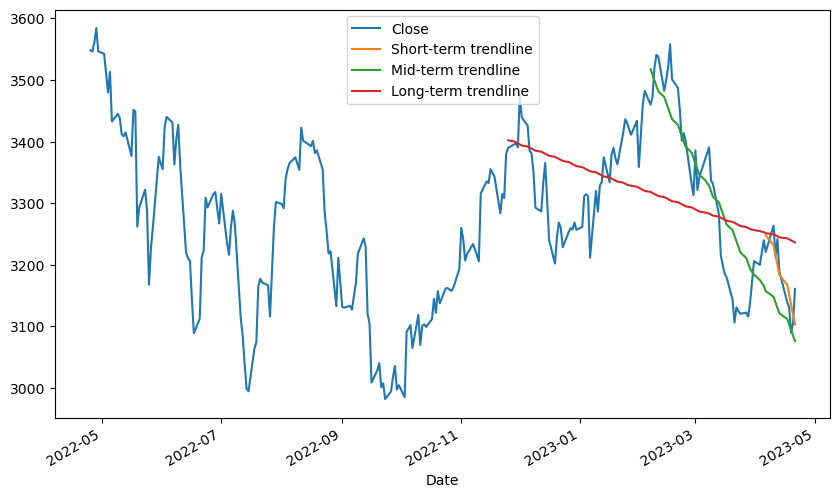

In [24]:
tcs.plot_trends()